In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfleft1= pd.read_csv('dim_claims.csv')
dfleft1

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1
...,...,...,...,...,...
1335571,1335572,417740,C,75.0,0
1335572,1335573,999001,C,NaN,1
1335573,1335574,417380,C,70.0,0
1335574,1335575,999001,C,NaN,1


In [3]:
dfleft2= pd.read_csv('bridge.csv')
dfleft2

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1
...,...,...,...
1335571,1335572,555950.0,1095
1335572,1335573,NaN,1095
1335573,1335574,555951.0,1095
1335574,1335575,NaN,1095


In [4]:
dfright= pd.read_csv('dim_pa.csv')
dfright

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1
...,...,...,...,...,...
555946,555947,1,0,1,0
555947,555948,1,0,1,1
555948,555949,1,1,1,1
555949,555950,1,0,0,1


In [5]:
merge1 = pd.merge(dfleft2, dfright, left_on= "dim_pa_id", right_on="dim_pa_id", how = "right")

In [6]:
print(merge1)

        dim_claim_id  dim_pa_id  dim_date_id  correct_diagnosis  \
0                  1        1.0            1                  1   
1                  3        2.0            1                  1   
2                 10        3.0            1                  0   
3                 11        4.0            1                  1   
4                 15        5.0            1                  0   
...              ...        ...          ...                ...   
555946       1335557   555947.0         1095                  1   
555947       1335558   555948.0         1095                  1   
555948       1335559   555949.0         1095                  1   
555949       1335572   555950.0         1095                  1   
555950       1335574   555951.0         1095                  0   

        tried_and_failed  contraindication  pa_approved  
0                      1                 0            1  
1                      0                 0            1  
2                    

In [7]:
merge2 = pd.merge(dfleft1, merge1, left_on= "dim_claim_id", right_on="dim_claim_id", how = "right")

In [8]:
print(merge2)

        dim_claim_id     bin drug  reject_code  pharmacy_claim_approved  \
0                  1  417380    A         75.0                        0   
1                  3  417740    A         76.0                        0   
2                 10  417380    A         75.0                        0   
3                 11  999001    A         76.0                        0   
4                 15  417614    A         70.0                        0   
...              ...     ...  ...          ...                      ...   
555946       1335557  417380    C         70.0                        0   
555947       1335558  417740    C         75.0                        0   
555948       1335559  417740    C         75.0                        0   
555949       1335572  417740    C         75.0                        0   
555950       1335574  417380    C         70.0                        0   

        dim_pa_id  dim_date_id  correct_diagnosis  tried_and_failed  \
0             1.0           

In [9]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   dim_claim_id             555951 non-null  int64  
 1   bin                      555951 non-null  int64  
 2   drug                     555951 non-null  object 
 3   reject_code              555951 non-null  float64
 4   pharmacy_claim_approved  555951 non-null  int64  
 5   dim_pa_id                555951 non-null  float64
 6   dim_date_id              555951 non-null  int64  
 7   correct_diagnosis        555951 non-null  int64  
 8   tried_and_failed         555951 non-null  int64  
 9   contraindication         555951 non-null  int64  
 10  pa_approved              555951 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 50.9+ MB


In [10]:
merge2.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,417380,A,75.0,0,1.0,1,1,1,0,1
1,3,417740,A,76.0,0,2.0,1,1,0,0,1
2,10,417380,A,75.0,0,3.0,1,0,0,1,1
3,11,999001,A,76.0,0,4.0,1,1,1,0,1
4,15,417614,A,70.0,0,5.0,1,0,1,0,1


In [11]:
df = merge2.drop(["dim_claim_id","dim_pa_id","dim_date_id", "pharmacy_claim_approved" ], axis= 1)

In [12]:
df.head()

,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,417380,A,75.0,1,1,0,1
1,417740,A,76.0,1,0,0,1
2,417380,A,75.0,0,0,1,1
3,999001,A,76.0,1,1,0,1
4,417614,A,70.0,0,1,0,1


In [13]:
df.columns

Index(['bin', 'drug', 'reject_code', 'correct_diagnosis', 'tried_and_failed',
       'contraindication', 'pa_approved'],
      dtype='object')

In [14]:
df.loc[df.bin == "999001"]

,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved


In [15]:
dfbin999 = pd.DataFrame(df.loc[df.bin == 999001]) 
dfbin999

,bin,drug,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved
3,999001,A,76.0,1,1,0,1
14,999001,A,76.0,1,1,0,1
16,999001,A,76.0,1,1,1,1
20,999001,A,76.0,1,1,1,1
29,999001,A,76.0,1,0,1,0
...,...,...,...,...,...,...,...
555893,999001,C,76.0,1,0,0,1
555897,999001,C,76.0,1,1,0,1
555908,999001,C,76.0,0,1,0,0
555920,999001,C,76.0,0,1,0,1


<AxesSubplot:xlabel='pa_approved', ylabel='count'>

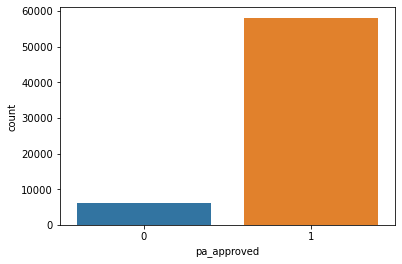

In [16]:
sns.countplot(x= 'pa_approved', data= dfbin999)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

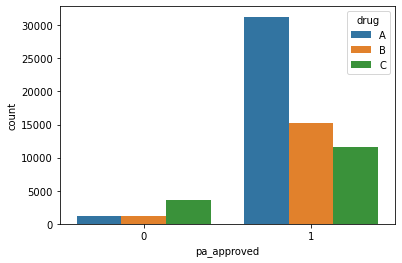

In [17]:
sns.countplot(x= 'pa_approved', hue = 'drug', data= dfbin999)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

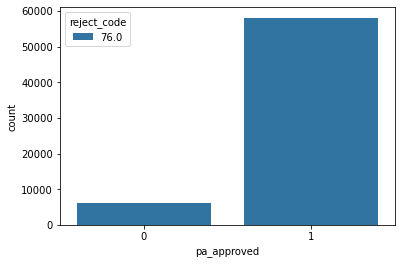

In [18]:
sns.countplot(x= 'pa_approved', hue = 'reject_code', data= dfbin999)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555951 entries, 0 to 555950
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bin                555951 non-null  int64  
 1   drug               555951 non-null  object 
 2   reject_code        555951 non-null  float64
 3   correct_diagnosis  555951 non-null  int64  
 4   tried_and_failed   555951 non-null  int64  
 5   contraindication   555951 non-null  int64  
 6   pa_approved        555951 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 33.9+ MB


<AxesSubplot:xlabel='pa_approved', ylabel='count'>

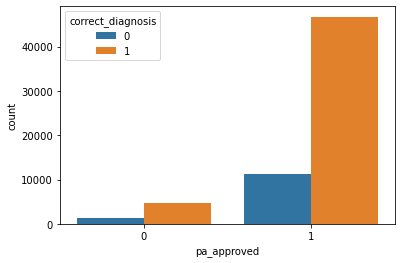

In [20]:
sns.countplot(x= 'pa_approved', hue = 'correct_diagnosis', data= dfbin999)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

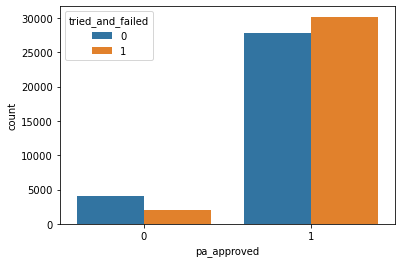

In [21]:
sns.countplot(x= 'pa_approved', hue = 'tried_and_failed', data= dfbin999)

<AxesSubplot:xlabel='pa_approved', ylabel='count'>

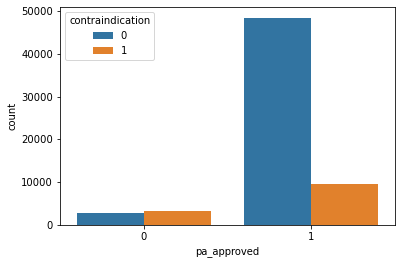

In [22]:
sns.countplot(x= 'pa_approved', hue = 'contraindication', data= dfbin999)

In [23]:
df = pd.get_dummies(dfbin999, columns= ['drug'])
df

,bin,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,drug_A,drug_B,drug_C
3,999001,76.0,1,1,0,1,1,0,0
14,999001,76.0,1,1,0,1,1,0,0
16,999001,76.0,1,1,1,1,1,0,0
20,999001,76.0,1,1,1,1,1,0,0
29,999001,76.0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
555893,999001,76.0,1,0,0,1,0,0,1
555897,999001,76.0,1,1,0,1,0,0,1
555908,999001,76.0,0,1,0,0,0,0,1
555920,999001,76.0,0,1,0,1,0,0,1


In [24]:
df = df.drop(['drug_C'], axis =1)

df

,bin,reject_code,correct_diagnosis,tried_and_failed,contraindication,pa_approved,drug_A,drug_B
3,999001,76.0,1,1,0,1,1,0
14,999001,76.0,1,1,0,1,1,0
16,999001,76.0,1,1,1,1,1,0
20,999001,76.0,1,1,1,1,1,0
29,999001,76.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
555893,999001,76.0,1,0,0,1,0,0
555897,999001,76.0,1,1,0,1,0,0
555908,999001,76.0,0,1,0,0,0,0
555920,999001,76.0,0,1,0,1,0,0


In [25]:
df = df.drop(["bin","reject_code"], axis= 1)
df

,correct_diagnosis,tried_and_failed,contraindication,pa_approved,drug_A,drug_B
3,1,1,0,1,1,0
14,1,1,0,1,1,0
16,1,1,1,1,1,0
20,1,1,1,1,1,0
29,1,0,1,0,1,0
...,...,...,...,...,...,...
555893,1,0,0,1,0,0
555897,1,1,0,1,0,0
555908,0,1,0,0,0,0
555920,0,1,0,1,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64073 entries, 3 to 555923
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   correct_diagnosis  64073 non-null  int64
 1   tried_and_failed   64073 non-null  int64
 2   contraindication   64073 non-null  int64
 3   pa_approved        64073 non-null  int64
 4   drug_A             64073 non-null  uint8
 5   drug_B             64073 non-null  uint8
dtypes: int64(4), uint8(2)
memory usage: 4.6 MB


In [27]:
X = df.drop(['pa_approved'], axis =1)
X

,correct_diagnosis,tried_and_failed,contraindication,drug_A,drug_B
3,1,1,0,1,0
14,1,1,0,1,0
16,1,1,1,1,0
20,1,1,1,1,0
29,1,0,1,1,0
...,...,...,...,...,...
555893,1,0,0,0,0
555897,1,1,0,0,0
555908,0,1,0,0,0
555920,0,1,0,0,0


In [28]:
y = df. pa_approved
y

3         1
14        1
16        1
20        1
29        0
         ..
555893    1
555897    1
555908    0
555920    1
555923    1
Name: pa_approved, Length: 64073, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=111,
                                                    shuffle=True,
                                                    stratify=y)

In [30]:
## import the KFold object from sklearn
from sklearn.model_selection import StratifiedKFold
## use clone to fit models
from sklearn.base import clone

from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

## make a kfold object using 10 splits, and shuffle the data before making the splits
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222)

accu = np.zeros((10,1))
prec = np.zeros((10,1))
rec = np.zeros((10,1))

i = 0

for train_index, test_index in kfold.split(X_train,y_train):
    print("train_train:", train_index, "train_test:", test_index)
    X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    LR = LogisticRegression()
    clone_reg = clone(LR)
    clone_reg.fit(X_train_train,y_train_train)
    y_pred = clone_reg.predict(X_train_test)

    accu[i,0] = accuracy_score(y_train_test,y_pred)
    prec[i,0] = precision_score(y_train_test,y_pred)
    rec[i,0] = recall_score(y_train_test,y_pred)

    i = i+1 

print(accu)
print(prec)
print(rec)

print("Average CV Accuracy is",np.mean(accu,axis=0))
print("Average CV Precision is",np.mean(prec,axis=0))
print("Average CV Recall is",np.mean(rec,axis=0))



train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0

In [39]:
## Decision tree with 10-fold CV while iterating max_depth
from sklearn.tree import DecisionTreeClassifier


kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222)

n = 10 
accu = np.zeros((10,n))
prec = np.zeros((10,n))
rec = np.zeros((10,n))

for j in range(1, n+1):
    DT = DecisionTreeClassifier(max_depth = j, random_state=333, criterion= 'entropy')
   
    i = 0

    for train_index, test_index in kfold.split(X_train,y_train):
        print("train_train:", train_index, "train_test:", test_index)
        X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    
        clone_reg = clone(DT)
        clone_reg.fit(X_train_train,y_train_train)
        y_pred = clone_reg.predict(X_train_test)

        accu[i,j-1] = accuracy_score(y_train_test,y_pred)
        prec[i,j-1] = precision_score(y_train_test,y_pred)
        rec[i, j-1] = recall_score(y_train_test,y_pred)

        i = i+1 
    
print(accu)
print(prec)
print(rec)

print("Average CV Accuracy is",np.mean(accu,axis=0))
print("Average CV Precision is",np.mean(prec,axis=0))
print("Average CV Recall is",np.mean(rec,axis=0))


train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0

train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0     1     2 ... 48050 48052 48053] train_test: [    3     4    15 ... 48031 48049 48051]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0

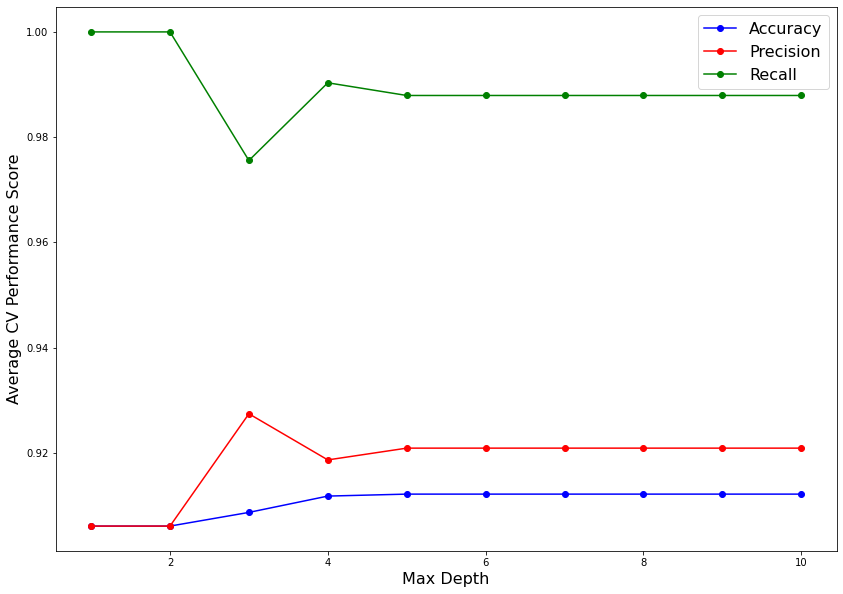

In [40]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accu,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(rec,axis=0),'g-o', label="Recall")

plt.ylabel("Average CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig("Decision Tree with CV while iterating max_depth.jpg")

plt.show()


In [41]:
## Random Forest with 10-fold CV while iterating max_depth
from sklearn.ensemble import RandomForestClassifier


kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222)

n = 10 
accu = np.zeros((10,n))
prec = np.zeros((10,n))
rec = np.zeros((10,n))

for j in range(1, n+1):
    
    RF = RandomForestClassifier(max_depth = j, random_state=333,criterion= 'entropy', n_estimators= 100)


    i = 0

    for train_index, test_index in kfold.split(X_train,y_train):
        print("train_train:", train_index, "train_test:", test_index)
        X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    
        clone_reg = clone(RF)
        clone_reg.fit(X_train_train,y_train_train)
        y_pred = clone_reg.predict(X_train_test)

        accu[i,j-1] = accuracy_score(y_train_test,y_pred)
        prec[i,j-1] = precision_score(y_train_test,y_pred)
        rec[i, j-1] = recall_score(y_train_test,y_pred)

        i = i+1 
    
print(accu)
print(prec)
print(rec)

print("Average CV Accuracy is",np.mean(accu,axis=0))
print("Average CV Precision is",np.mean(prec,axis=0))
print("Average CV Recall is",np.mean(rec,axis=0))


train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0

train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0     1     2 ... 48050 48052 48053] train_test: [    3     4    15 ... 48031 48049 48051]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0

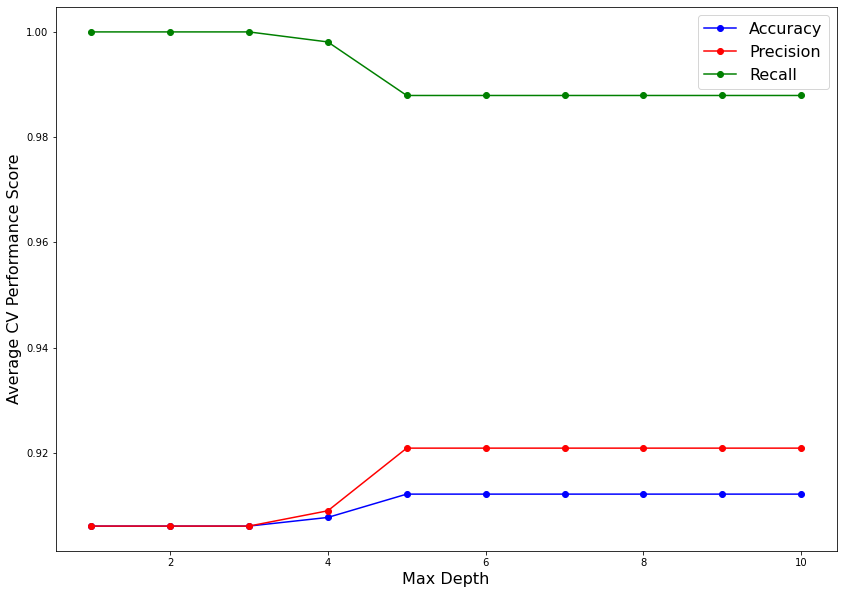

In [42]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accu,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(rec,axis=0),'g-o', label="Recall")

plt.ylabel("Average CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.savefig("Random Forest with CV while iterating max_depth.jpg")

plt.show()


In [35]:
## Random Forest with 10-fold CV while iterating n estimators
from sklearn.ensemble import RandomForestClassifier


kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222)
trees =np.arange(20,500,40)

n = len(trees)
accu = np.zeros((10,n))
prec = np.zeros((10,n))
rec = np.zeros((10,n))

for j in range(len(trees)):  
    RF = RandomForestClassifier(random_state=333, criterion= 'entropy', n_estimators=trees[j-1])

    i = 0

    for train_index, test_index in kfold.split(X_train,y_train):
                                
        X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    
        clone_reg = clone(RF)
        clone_reg.fit(X_train_train,y_train_train)
        y_pred = clone_reg.predict(X_train_test)

        accu[i,j-1] = accuracy_score(y_train_test,y_pred)
        prec[i,j-1] = precision_score(y_train_test,y_pred)
        rec[i, j-1] = recall_score(y_train_test,y_pred)

        i = i+1 
    
print(accu)
print(prec)
print(rec)

print("Average CV Accuracy is",np.mean(accu,axis=0))
print("Average CV Precision is",np.mean(prec,axis=0))
print("Average CV Recall is",np.mean(rec,axis=0))


[[0.91052851 0.91052851 0.91052851 0.91052851 0.91052851 0.91052851
  0.91052851 0.91052851 0.91052851 0.91052851 0.91052851 0.91052851]
 [0.90886392 0.90886392 0.90886392 0.90886392 0.90886392 0.90886392
  0.90886392 0.90886392 0.90886392 0.90886392 0.90886392 0.90886392]
 [0.91385768 0.91385768 0.91385768 0.91385768 0.91385768 0.91385768
  0.91385768 0.91385768 0.91385768 0.91385768 0.91385768 0.91385768]
 [0.91302538 0.91302538 0.91302538 0.91302538 0.91302538 0.91302538
  0.91302538 0.91302538 0.91302538 0.91302538 0.91302538 0.91302538]
 [0.91383975 0.91383975 0.91383975 0.91383975 0.91383975 0.91383975
  0.91383975 0.91383975 0.91383975 0.91383975 0.91383975 0.91383975]
 [0.9157128  0.9157128  0.9157128  0.9157128  0.9157128  0.9157128
  0.9157128  0.9157128  0.9157128  0.9157128  0.9157128  0.9157128 ]
 [0.91050989 0.91050989 0.91050989 0.91050989 0.91050989 0.91050989
  0.91050989 0.91050989 0.91050989 0.91050989 0.91050989 0.91050989]
 [0.91425598 0.91425598 0.91425598 0.91425

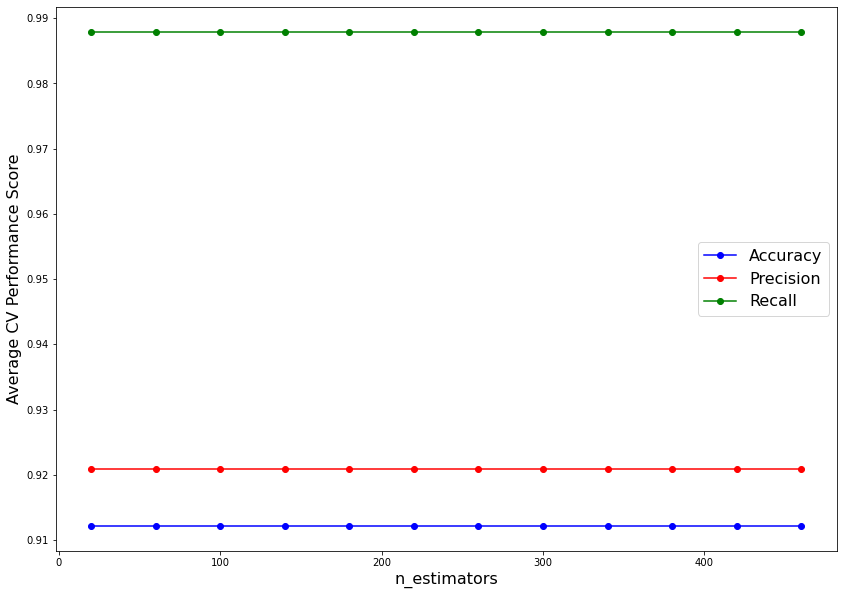

In [36]:
plt.figure(figsize=(14,10))

plt.plot(trees, np.mean(accu,axis=0),'b-o', label="Accuracy")
plt.plot(trees, np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(trees, np.mean(rec,axis=0),'g-o', label="Recall")

plt.ylabel("Average CV Performance Score",fontsize=16)
plt.xlabel("n_estimators",fontsize=16)

plt.legend(fontsize=16)

plt.savefig("Random Forest with CV while iterating estimators.jpg")

In [37]:
## Logistic Regression with 10-fold CV while optimizing cutoff
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 222)

Cutoffs =np.arange(0.0,1.0,0.1)

n = len(Cutoffs)
accu = np.zeros((10,n))
prec = np.zeros((10,n))
rec = np.zeros((10,n))



for j in range(1, n+1):
    

    LR = LogisticRegression(random_state=333)

    i = 0

    for train_index, test_index in kfold.split(X_train,y_train):
        print("train_train:", train_index, "train_test:", test_index)
        X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
        clone_reg = clone(LR)
        clone_reg.fit(X_train_train,y_train_train)

        probs = clone_reg.predict_proba(X_train_test)[:,0]
        
        y_pred = 1*(probs > Cutoffs[j-1])
        
        accu[i,j-1] = accuracy_score(y_train_test,y_pred)
        prec[i,j-1] = precision_score(y_train_test,y_pred)
        rec[i, j-1] = recall_score(y_train_test,y_pred)

        i = i+1 
    
print(accu)
print(prec)
print(rec)

print("Average CV Accuracy is",np.mean(accu,axis=0))
print("Average CV Precision is",np.mean(prec,axis=0))
print("Average CV Recall is",np.mean(rec,axis=0))


train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0

train_train: [    0     1     2 ... 48050 48052 48053] train_test: [    3     4    15 ... 48031 48049 48051]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0     1     2 ... 48050 48052 48053] train_test: [    3     4    15 ... 48031 48049 48051]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   20    24    49 ... 48000 48013 48044]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    9    10    14 ... 48018 48032 48038]
train_train: [    0     1     2 ... 48050 48051 48053] train_test: [   11    18    39 ... 48023 48034 48052]
train_train: [    0     2     3 ... 48051 48052 48053] train_test: [    1     5    16 ... 48030 48040 48048]
train_train: [    1     2     3 ... 48051 48052 48053] train_test: [    0    32    37 ... 48012 48026 48050]
train_train: [    0     1     3 ... 48051 48052 48053] train_test: [    2     7     8 ... 48042 48046 48047]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

train_train: [    0     1     2 ... 48051 48052 48053] train_test: [    6    25    29 ... 48033 48036 48039]
train_train: [    0     1     2 ... 48050 48051 48052] train_test: [   13    22    34 ... 48043 48045 48053]
train_train: [    0     1     2 ... 48051 48052 48053] train_test: [   12    36    53 ... 48020 48024 48035]
train_train: [    0     1     2 ... 48050 48052 48053] train_test: [    3     4    15 ... 48031 48049 48051]
[[0.90615897 0.22908864 0.16125676 0.09612984 0.09446525 0.08947149
  0.08843113 0.09134415 0.09384103 0.09384103]
 [0.90595089 0.20911361 0.15210154 0.09321681 0.09196837 0.09113608
  0.09071993 0.09259259 0.09404911 0.09404911]
 [0.90595089 0.20744902 0.14398668 0.08884727 0.08739076 0.08614232
  0.08655847 0.09196837 0.09404911 0.09404911]
 [0.90595089 0.21785268 0.156263   0.08822305 0.08843113 0.08697462
  0.08780691 0.09196837 0.09404911 0.09404911]
 [0.90613944 0.20978148 0.14797086 0.09386056 0.0917794  0.08616025
  0.0880333  0.09094693 0.09386056 0

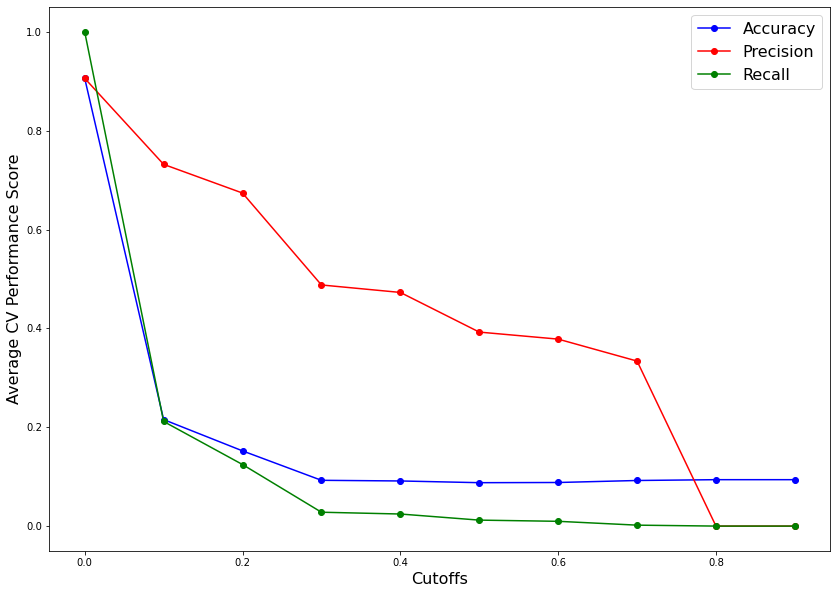

In [38]:
plt.figure(figsize=(14,10))

plt.plot(Cutoffs, np.mean(accu,axis=0),'b-o', label="Accuracy")
plt.plot(Cutoffs, np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(Cutoffs, np.mean(rec,axis=0),'g-o', label="Recall")

plt.ylabel("Average CV Performance Score",fontsize=16)
plt.xlabel("Cutoffs",fontsize=16)

plt.legend(fontsize=16)